1.Importing The Required Libraries

2.Importing the datasets

In [2]:
import nltk
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment=None
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install textblob
#!pip install wordcloud
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from textblob.classifiers import NaiveBayesClassifier
import pickle

In [3]:
train = [
...     ('Raila the fifth.', 'pos'),
...     ('I will vote for Raila!', 'pos'),
...     ('Baba and mama.', 'pos'),
...     ('Raila is a good man.', 'pos'),
...     ("This round Ruto will win", 'pos'),
...     ('I will not vote for Raila', 'neg'),
...     ('Ruto is a thief.', 'neg'),
...     ("Raila will never be a president", 'neg'),
...     ('Ruto is my sworn enemy!', 'neg'),
...     ('Ruto is horrible.', 'neg')
... ]

test = [
...     ('raila and Karua is a good combination.', 'pos'),
     ('Lets make Kenya better again by voting for raila.', 'pos'),
     ('Lets vote for raila.', 'pos'),
     
...     ('Raila wont make it.',    'neg'),
...     ("Ruto is a good man.", 'neg'),
...     ("Ruto  is amazing!", 'pos'),
...     ('Raila will make Kenya Better.', 'pos'),
...     ("Raila is an enemy.", 'neg'),
        ("Ruto is not worth to be a president.", 'neg'),
     ("Ruto is vetry violent.", 'neg')
    
... ]

In [4]:
cl = NaiveBayesClassifier(train) 

In [5]:
print(cl.classify("Raila and Karua!"))


pos


In [6]:
print(cl.classify("Ruto will never be a president!"))

neg


In [7]:
cl.accuracy(test) 

0.8

In [8]:
raila_reviews = pd.read_csv('C:/Users/hp/Downloads/archive/raila.csv', encoding = 'utf-8')
ruto_reviews = pd.read_csv('C:/Users/hp/Downloads/archive/ruto.csv', encoding = 'utf-8')

3.Sentiment Analysis using TextBlob

In [9]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

4.Data Analysis

In [28]:
ruto_reviews.head()

,Number,Comment,Sentiment_Polarity,Expression Label
0,1,Rigathi is not a good man,-0.350000,negative
11,12,ATTENTION ????ATTENTION ????HAPA KUNA BIZ INAT...,0.166667,positive
17,18,We all are here with the goal of securing a jo...,0.200000,positive
32,33,Good question!!,1.000000,positive
33,34,"It's not only referee who will decide, there m...",0.200000,positive


In [29]:
raila_reviews['Sentiment_Polarity']=raila_reviews['Comment'].apply(find_pol)
raila_reviews['Expression Label']=np.where(raila_reviews['Sentiment_Polarity']>0,'positive','negative')
raila_reviews['Expression Label'][raila_reviews.Sentiment_Polarity==0]= "Neutral"

new1= raila_reviews.groupby('Expression Label').count()
x=list(new1['Sentiment_Polarity'])
y=list(new1.index)
tuple_list = list(zip(x,y))
df=pd.DataFrame(tuple_list,columns=['x','y'])
df['color']='blue'
df['color'][1]='red'
df['color'][2]='green'
import plotly.graph_objects as go
fig=go.Figure(go.Bar(x=df['x'], y=df['y'],orientation='h',marker={'color':df['color']}))
fig.show()

In [12]:
ruto_reviews['Sentiment_Polarity']=ruto_reviews['Comment'].apply(find_pol)
ruto_reviews['Expression Label']=np.where(ruto_reviews['Sentiment_Polarity']>0,'positive','negative')
ruto_reviews['Expression Label'][ruto_reviews.Sentiment_Polarity==0]= "Neutral"
ruto_reviews.tail()

new2= ruto_reviews.groupby('Expression Label').count()
x=list(new2['Sentiment_Polarity'])
y=list(new2.index)
tuple_list = list(zip(x,y))
df=pd.DataFrame(tuple_list,columns=['x','y'])
df['color']='blue'
df['color'][1]='red'
df['color'][2]='green'
import plotly.graph_objects as go
fig=go.Figure(go.Bar(x=df['x'], y=df['y'],orientation='h',marker={'color':df['color']}))
fig.show()


In [13]:
reviews1 = raila_reviews[raila_reviews['Sentiment_Polarity'] == 0.0000]
reviews1.shape

(80, 4)

In [14]:
reviews2 = ruto_reviews[ruto_reviews['Sentiment_Polarity'] == 0.0000]
reviews2.shape

(88, 4)

5.Data Cleaning & Preprocessing

5(a) Dropping Neutral Comments

In [15]:
cond1=raila_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
raila_reviews.drop(raila_reviews[cond1].index, inplace = True)
raila_reviews.shape

(16, 4)

In [16]:
cond2=ruto_reviews['Sentiment_Polarity'].isin(reviews2['Sentiment_Polarity'])
ruto_reviews.drop(ruto_reviews[cond2].index, inplace = True)
ruto_reviews.shape

(11, 4)

6. Balancing the Datasets

In [17]:
np.random.seed(10)
remove_n =6
drop_indices = np.random.choice(raila_reviews.index, remove_n, replace=False)
df_subset_raila = raila_reviews.drop(drop_indices)
df_subset_raila.shape

(10, 4)

In [18]:
np.random.seed(10)
remove_n =1
drop_indices = np.random.choice(ruto_reviews.index, remove_n, replace=False)
df_subset_ruto = ruto_reviews.drop(drop_indices)
df_subset_ruto.shape

(10, 4)

7.Data Visualization

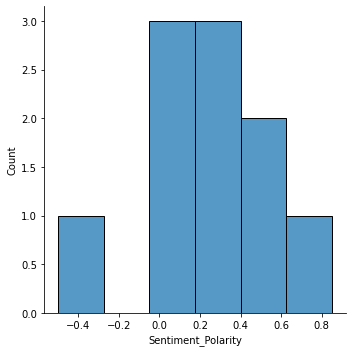

In [19]:

sns.displot(df_subset_raila['Sentiment_Polarity'])



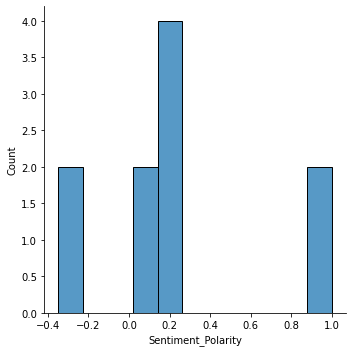

In [20]:
sns.displot(df_subset_ruto['Sentiment_Polarity'])

In [21]:
count_1 = df_subset_raila.groupby('Expression Label').count()
print(count_1)

                  Number  Comment  Sentiment_Polarity
Expression Label                                     
negative               1        1                   1
positive               9        9                   9


In [22]:
negative_per1 = (count_1['Sentiment_Polarity'][0]/9)*10
positive_per1 = (count_1['Sentiment_Polarity'][1]/9)*100

In [23]:
count_2 = df_subset_ruto.groupby('Expression Label').count()
print(count_2)

                  Number  Comment  Sentiment_Polarity
Expression Label                                     
negative               2        2                   2
positive               8        8                   8


In [24]:
negative_per2 = (count_2['Sentiment_Polarity'][0]/9)*100
positive_per2 = (count_2['Sentiment_Polarity'][1]/9)*100

8. Predicted Results based on Visualization

In [25]:
Politicians = ['Raila Odinga', 'William Ruto']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [26]:
with open('sentiment_pkl','wb') as files:
    pickle.dump(cl,files)

In [27]:
#from textblob.classifiers import NaiveBayesClassifier
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
